<h3 style="text-align: center;"><b>«Практическое занятие по статистическим тестам»</b></h3>

In [27]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Параметрические тесты
### Тест Стьюдента

Проверка среднего значения двух выборок или одной выборки с целевым значением

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Распределение данных - нормальное или близкое к нормальному. Можно применять для других распределений, но осторожно.
* Одинаковая вариация (дисперсия) в выборках.

Гипотеза

* H0: Средние выборок одинаковы / Средние выборки совпадает с целевым значением 
* H1: Средние выборок различаются / Средние выборки отличается от целевого значения

### Одновыборочный тест   `st.ttest_1samp`

## $t={\frac {{\bar {x}}-\mu _{0}}{s/{\sqrt {n}}}} = {\frac {{\bar {x}}-\mu _{0}}{\sqrt {\frac{s^2}{n}}}}$

<b>Пример.</b> Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!). Рассмотрим некоторое количество голосующих из Лузитании и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения? Сейчас выясним!

In [2]:
np.random.seed(54)

population_ages1=st.norm.rvs(loc=23, scale=30, size=15000)   
population_ages2=st.norm.rvs(loc=20, scale=10, size=10000)
population_ages=np.concatenate((population_ages1,population_ages2))  # Сгенерировали всю популяцию. 
population_ages = population_ages[population_ages > 0 ]
# population_ages.min(), population_ages.max()

In [3]:
luzit_ages1=st.norm.rvs(loc=22, scale=15, size=2000)  # Индия 1
luzit_ages2=st.norm.rvs(loc=23, scale=25, size=2000)
luzit_ages=np.concatenate((luzit_ages1, luzit_ages2)) #Выборка
luzit_ages = luzit_ages[luzit_ages >0 ]

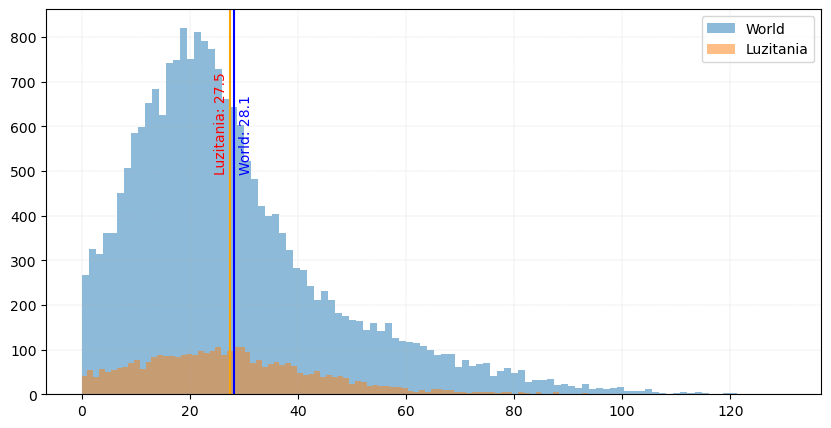

Средний возраст всего мира 28.149523517725374
Средний возраст лузитанцев 27.5391920285891


In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(pd.DataFrame(population_ages), bins=  100, alpha = 0.5, label='World')
plt.axvline(population_ages.mean(),c='b')
plt.text(population_ages.mean()+1,500,f'World: {population_ages.mean():.1f}',c='b',rotation=90)

ax.hist(pd.DataFrame(luzit_ages), bins = 100, alpha = 0.5, label= 'Luzitania')
# plt.vlines(x=luzit_ages.mean(), ymin=25, ymax=2500, colors='orange', ls=':', lw=2, label= 'Luzitania') 
plt.axvline(luzit_ages.mean(),c='orange')
plt.text(luzit_ages.mean()-3,500,f'Luzitania: {luzit_ages.mean():.1f}',c='r',rotation=90)
ax.plot(population_ages.mean())

ax.grid(linestyle=':', linewidth=0.3)
plt.legend()
plt.show()
print('Средний возраст всего мира', population_ages.mean())
print('Средний возраст лузитанцев', luzit_ages.mean())

In [5]:
# Calculate the T-test for the mean of ONE group of scores.

# This is a test for the null hypothesis that the expected value (mean) of 
# a sample of independent observations 'a' is equal to the given population mean, 'popmean'.


stat, p = st.ttest_1samp(a=luzit_ages, popmean=population_ages.mean()) 

print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средний возраст в Лузитании, вероятно, не отличается от среднего по миру")
else:
    print("Отклоняем нулевую гипотезу, средний возраст в Лузитании, вероятно, отличается от среднего по миру")

Статистика = -2.198, p = 0.028
Отклоняем нулевую гипотезу, средний возраст в Лузитании, вероятно, отличается от среднего по миру


In [6]:
st.ttest_ind(luzit_ages, population_ages,  equal_var= False)

Ttest_indResult(statistic=-1.98869098485483, pvalue=0.04678739365268283)

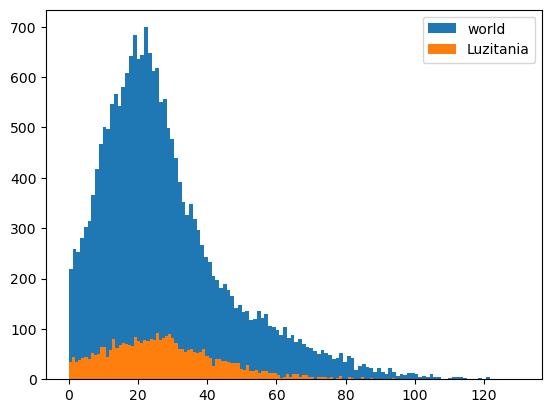

In [7]:
plt.hist(population_ages, bins=120, label= "world"); # Вся популяция.
plt.hist(luzit_ages, bins=120, label= 'Luzitania');  # Выборка
plt.legend()

### Тест для двух выборок  `st.ttest_ind`

## $t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}} = \frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{\sqrt {{\frac {s_{1}^{2}}{n_{1}}}+{\frac {s_{2}^{2}}{n_{2}}}}}$

<b>Пример.</b> Такой тест показывает, имеют ли две выборки разные средние значения. Здесь нулевая гипотеза заключается в том, что обе группы имеют равные средние.

In [8]:
np.random.seed(54)

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
data1 = st.norm.rvs(loc=50, scale=10, size=100)  
data2 = st.norm.rvs(loc=40, scale=15, size=100) 

stat, p = st.ttest_ind(data1, data2)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 4.28499, p = 0.0000285042
Отклоняем нулевую гипотезу, средние, вероятно, различаются


По умолчанию критерий Стьюдента подразумевает равенство дисперсий двух выборок.  
Если дисперсии отличаются (можно проверить с помощью F-теста), то нужно использовать поправку Уэлча (Welch). В scipy это реализовано через параметр функции ttest_ind: `equal_var = False`

In [9]:
# Calculate the T-test for the means of *two independent* samples of scores.

# This is a test for the null hypothesis that 2 independent samples have identical 
# average (expected) values. This test assumes that the populations have identical variances by default.


stat, p = st.ttest_ind(data1, data2, equal_var = False)  # different variances

print(f"Статистика = {stat:.5f}, p = {p:.10f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 4.28499, p = 0.0000311336
Отклоняем нулевую гипотезу, средние, вероятно, различаются


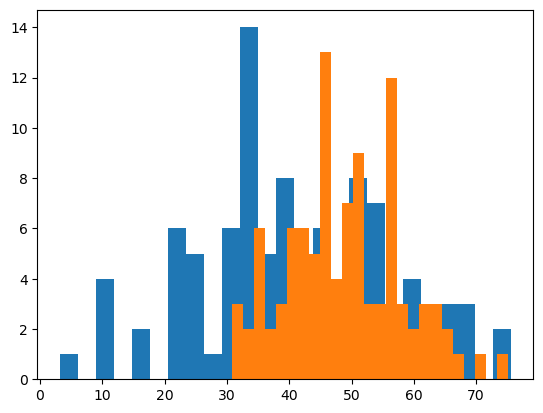

In [10]:
plt.hist(data2, bins=25); #Выборка A
plt.hist(data1, bins=25);  #Выборка B

Means: data1- 48.9, data2- 41.1


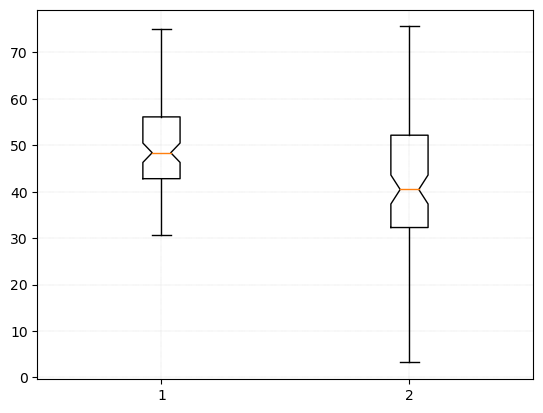

In [11]:
plt.boxplot([data1,data2], notch= True);
# plt.boxplot(data2);
plt.grid(linestyle=':', linewidth=0.3)
print(f'Means: data1- {data1.mean():.01f}, data2- {data2.mean():.01f}')

<b>Помимо проверки, что выборки могу значимо различаться, t-Тест еще полезен при поиске выбросов в данных.</b>

### Парный тест Стьюдента  `st.ttest_rel(a=before, b=after)`
Сравнивает средние значения при связанных данных, когда измерения проводились, например, до и после каких-то изменений. 

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Распределение данных - нормальное или близкое к нормальному. Можно применять для других распределений, но осторожно.
* Одинаковая вариация в выборках.
* Наблюдения связаны попарно в двух выборках

Гипотеза

* H0: Средние выборок одинаковы.
* H1: Средние выборок различаются.

## $t={\frac {{\bar {X}}_{D}-\mu _{0}}{s_{D}/{\sqrt {n}}}}$

* where ${\bar {X}}_{D}$ and $s_{D}$ are the average and standard deviation of the differences between all pairs.  
 The pairs are e.g. either one person's pre-test and post-test scores or between-pairs of persons matched into meaningful groups.
* The constant $μ_{0}$ is zero if we want to test whether the average of the difference is significantly different. 
* The degree of freedom used is $n − 1$, where $n$ represents the number of pairs.

<b>Пример.</b> В парном выборочном t-тесте каждый объект измеряется дважды, в результате чего получаются пары наблюдений. Предположим, нас интересует оценка эффективности программы обучения компании. Один из подходов, который вы можете рассмотреть, - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного t-критерия. 

In [12]:
np.random.seed(54)
# rvs - Random variates of given type.
before = st.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + st.norm.rvs(scale = 5, loc = -.273, size = 100)
weight_df = pd.DataFrame({"вес_до":before,
                         "вес_после":after,
                         "вес_изменение":after-before})
weight_df.describe()

вес_до   вес_после  вес_изменение
count  100.000000  100.000000     100.000000
mean   246.691328  246.800651       0.109323
std     28.161039   28.746787       5.153353
min    192.332479  189.122861     -12.533319
25%    228.405828  225.747076      -2.846210
50%    245.169221  244.712994      -0.115017
75%    268.328626  266.582395       3.782396
max    325.254027  319.269443      11.587162

In [13]:
# Calculate the t-test on TWO RELATED samples of scores, a and b.

# This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.
# Returns: statistic (t-statistic), pvalue


stat, p = st.ttest_rel(a=before, b=after)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -0.212, p = 0.832
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


### А если распределение не нормальное?
В этом случае можно использовать непараметрические тесты или преобразования данных... С преобразованиями данных нужно быть аккуратнее, так как после преобразования меняется масштаб данных и единицы измерения, что может затруднять интерпретацию.

<b>Пример.</b> Рассмотрим рынок жилья в Нью-Йорке.

New York City Airbnb Open Data Airbnb listings and metrics in NYC, NY, USA (2019)

<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png
"  width=400></p>

In [14]:
url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, on_bad_lines='skip')
df.dropna(how='any',inplace=True)
df.head(3)

id                                name  host_id    host_name  \
0  2539  Clean & quiet apt home by the park     2787         John   
1  2595               Skylit Midtown Castle     2845     Jennifer   
3  3831     Cozy Entire Floor of Brownstone     4869  LisaRoxanne   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
3     89               1                270  2019-07-05               4.64   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
3                               1               194

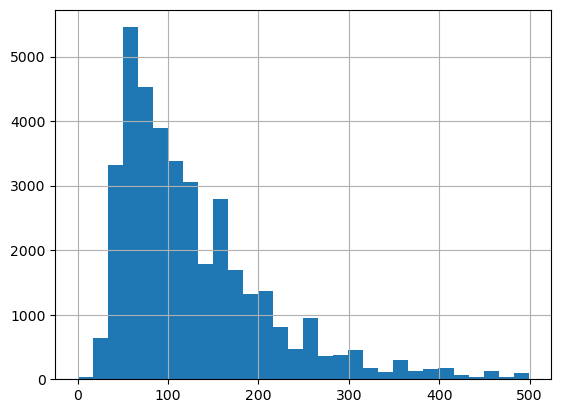

In [15]:
df[df.price<500].price.hist(bins=30);

<b>Преобразуем данные</b>

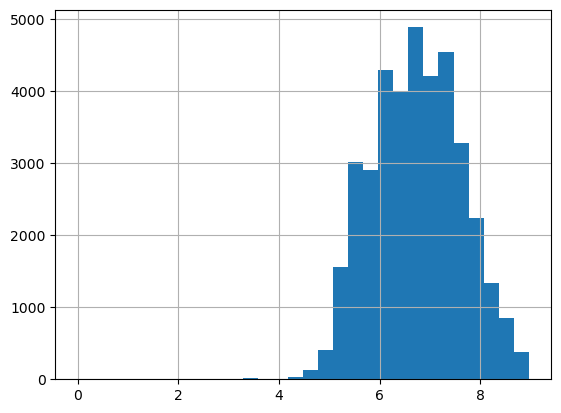

In [16]:
np.log2(abs(df[df.price<500].price)+1).hist(bins=30);

<b>Теперь можно применять параметрические тесты!</b>

## Непараметрические тесты
### Тест Манна-Уитни   `st.mannwhitneyu(data1, data2)`
Критерий Манна-Уитни представляет непараметрическую альтернативу критерия Стьюдента для независимых выборок и используется для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. 

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Наблюдения можно проранжировать.

Гипотеза

* H0: Распределения одинаковы.
* H1: Распределения различаются.

In [17]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938,-0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

# Perform the Mann-Whitney U rank test on two independent samples.

# The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution 
# underlying sample x is the same as the distribution underlying sample y. 
# It is often used as a test of difference in location between distributions.


stat, p = st.mannwhitneyu(data1, data2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 40.00000, p = 0.47268
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


### Тест Вилкоксона  `st.wilcoxon(data1, data2)`
Тест Вилкоксона - это непараметрический аналог парного критерия Стьюдента. 

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Наблюдения можно проранжировать.
* Наблюдения связаны попарно в двух выборках

Гипотеза

* H0: Две связанные выборки принадлежат одному распределению.
* H1: Две связанные выборки принадлежат разным распределениям.

The samples x and y must have the **SAME** length.

In [31]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
len(data1) == len(data2)

True

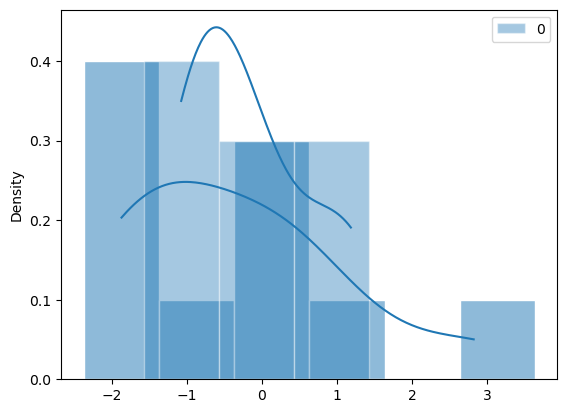

In [29]:
sns.histplot(pd.DataFrame(data1), kde=True,  stat="density", discrete=True, edgecolor= (1,)*4)
sns.histplot(pd.DataFrame(data2), kde=True, stat="density", discrete=True, 
                kde_kws=dict(cut=0), alpha=.4, edgecolor=(1, 1, 1, .4)
            );

данные НЕ нормальные и ЗАВИСИМЫЕ => wilcoxon

In [32]:
# Calculate the Wilcoxon signed-rank test.

# The Wilcoxon signed-rank test tests the null hypothesis that two related paired sample
# come from the same distribution. 
# In particular, it tests whether the distribution of the differences x - y is symmetric about zero. 
# It is a non-parametric version of the paired T-test.

stat, p = st.wilcoxon(x= data1, y= data2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 21.00000, p = 0.55664
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [36]:
# st.wilcoxon could take the DIFFERENCES between x and y
dif = np.array(data1) - np.array(data2)
stat, p = st.wilcoxon(x = dif, y = None) # or the differences between two sets (if y = None)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 21.00000, p = 0.55664
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


### Точный критерий Фишера  `st.fisher_exact(cont_table) `
Критерий Стьюдента позволяет работать с численными переменными, но не позволяет работать с категориальными. Для этого существует критерий Фишера (или Хи-квадрат). Одна из его задач сказать, насколько случайно распределены значения между группами. Позволяет проверить гипотезу, есть ли значимый перевес между группами. 

Допущения

* Наблюдения независимы друг от друга.
* Встречаются ограничения на минимальное число наблюдений. 

Гипотеза

* H0: Выборки независимы.
* H1: Есть некторая зависимость.

<b>Пример.</b> Мы хотим проверить нет ли дискриминации по половому признаку в сфере Data Science. Вы узнали, что в какой-то компании после серии собеседований 107 мужчин взяли на работу, а отказали 93-м мужчинам. А среди женщин 74 взяли, а отказали 45-и. Относится ли руководство компании предвзято к мужчинам или к женщинам?

In [20]:
x = [[107,93],[74,45]]
# Perform a Fisher exact test on a 2x2 contingency table.

# The null hypothesis is that the true odds ratio of the populations underlying the observations is one, 
# and the observations were sampled from these populations under a condition: 
# the marginals of the resulting table must equal those of the observed table. 
# The statistic returned is the unconditional maximum likelihood estimate of the odds ratio, 
# and the p-value is the probability under the null hypothesis of obtaining a table 
# at least as extreme as the one that was actually observed. 
# There are other possible choices of statistic and two-sided p-value definition associated with 
# Fisher's exact test; please see the Notes for more information.



oddsratio, p = st.fisher_exact(x) # Точный тест Фишера

print(f"Статистика = {oddsratio:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выборки, вероятно, независимы')
else:
    print('Отклоняем нулевую гипотезу, вероятно, есть некоторая зависимость')

Статистика = 0.69965, p = 0.16076
Не отклоняем нулевую гипотезу, выборки, вероятно, независимы


### Тест Хи-квадрат  `st.chi2_contingency(contingency_table)`
Например, вы хотите проверить правда ли эксперт по Data Science таковым является. Вы составили список вопросов, спросили эксперта и случайных прохожих. Количество правильный вопросов по каждому разделу вы записали в таблицу (таблица смежности)

Выясните, исходя из полученных данных, действительно ли перед вами носитель экспертности или пока что еще не очень опытный начинаюший?

In [21]:
contingency_table = pd.DataFrame(
    [  
[22, 99, 59],        
[10, 12, 31]
    ],
    columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Эксперт', 'Случайный прохожий'])

print('Реальная таблица')
print(contingency_table)

Реальная таблица
                    Machine Learning  Data Science  Analytics
Эксперт                           22            99         59
Случайный прохожий                10            12         31


In [22]:
# Chi-square test of independence of variables in a contingency table.

# This function computes the chi-square statistic and p-value for the hypothesis test 
# of independence of the observed frequencies in the contingency table [1]_ observed. 
# The expected frequencies are computed based on the marginal sums under the assumption of independence; 
# see scipy.stats.contingency.expected_freq. 
# dof = observed.size - sum(observed.shape) + observed.ndim - 1



chi, pval, dof, exp = st.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
significance = 0.05

print(f"p-value = {pval:.6f}, уровень значимости = {significance:.2f}")

print(pval)
if pval < significance:
    print(f"На уровене значимости {significance:.2f}, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.")
    print('Это правда эксперт!')
else:
    print(f"На уровене значимости {significance:.2f}, мы не отвергаем нулевые гипотезы. Они независимы.")
    
# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

p-value = 0.000173, уровень значимости = 0.05
0.00017303774198262266
На уровене значимости 0.05, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.
Это правда эксперт!


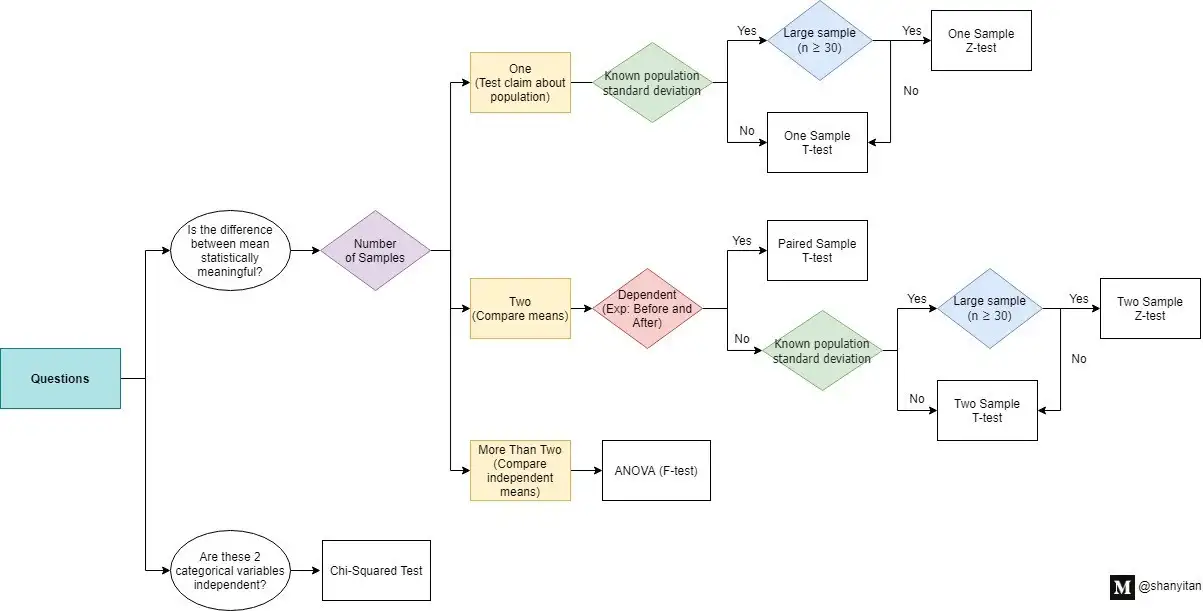

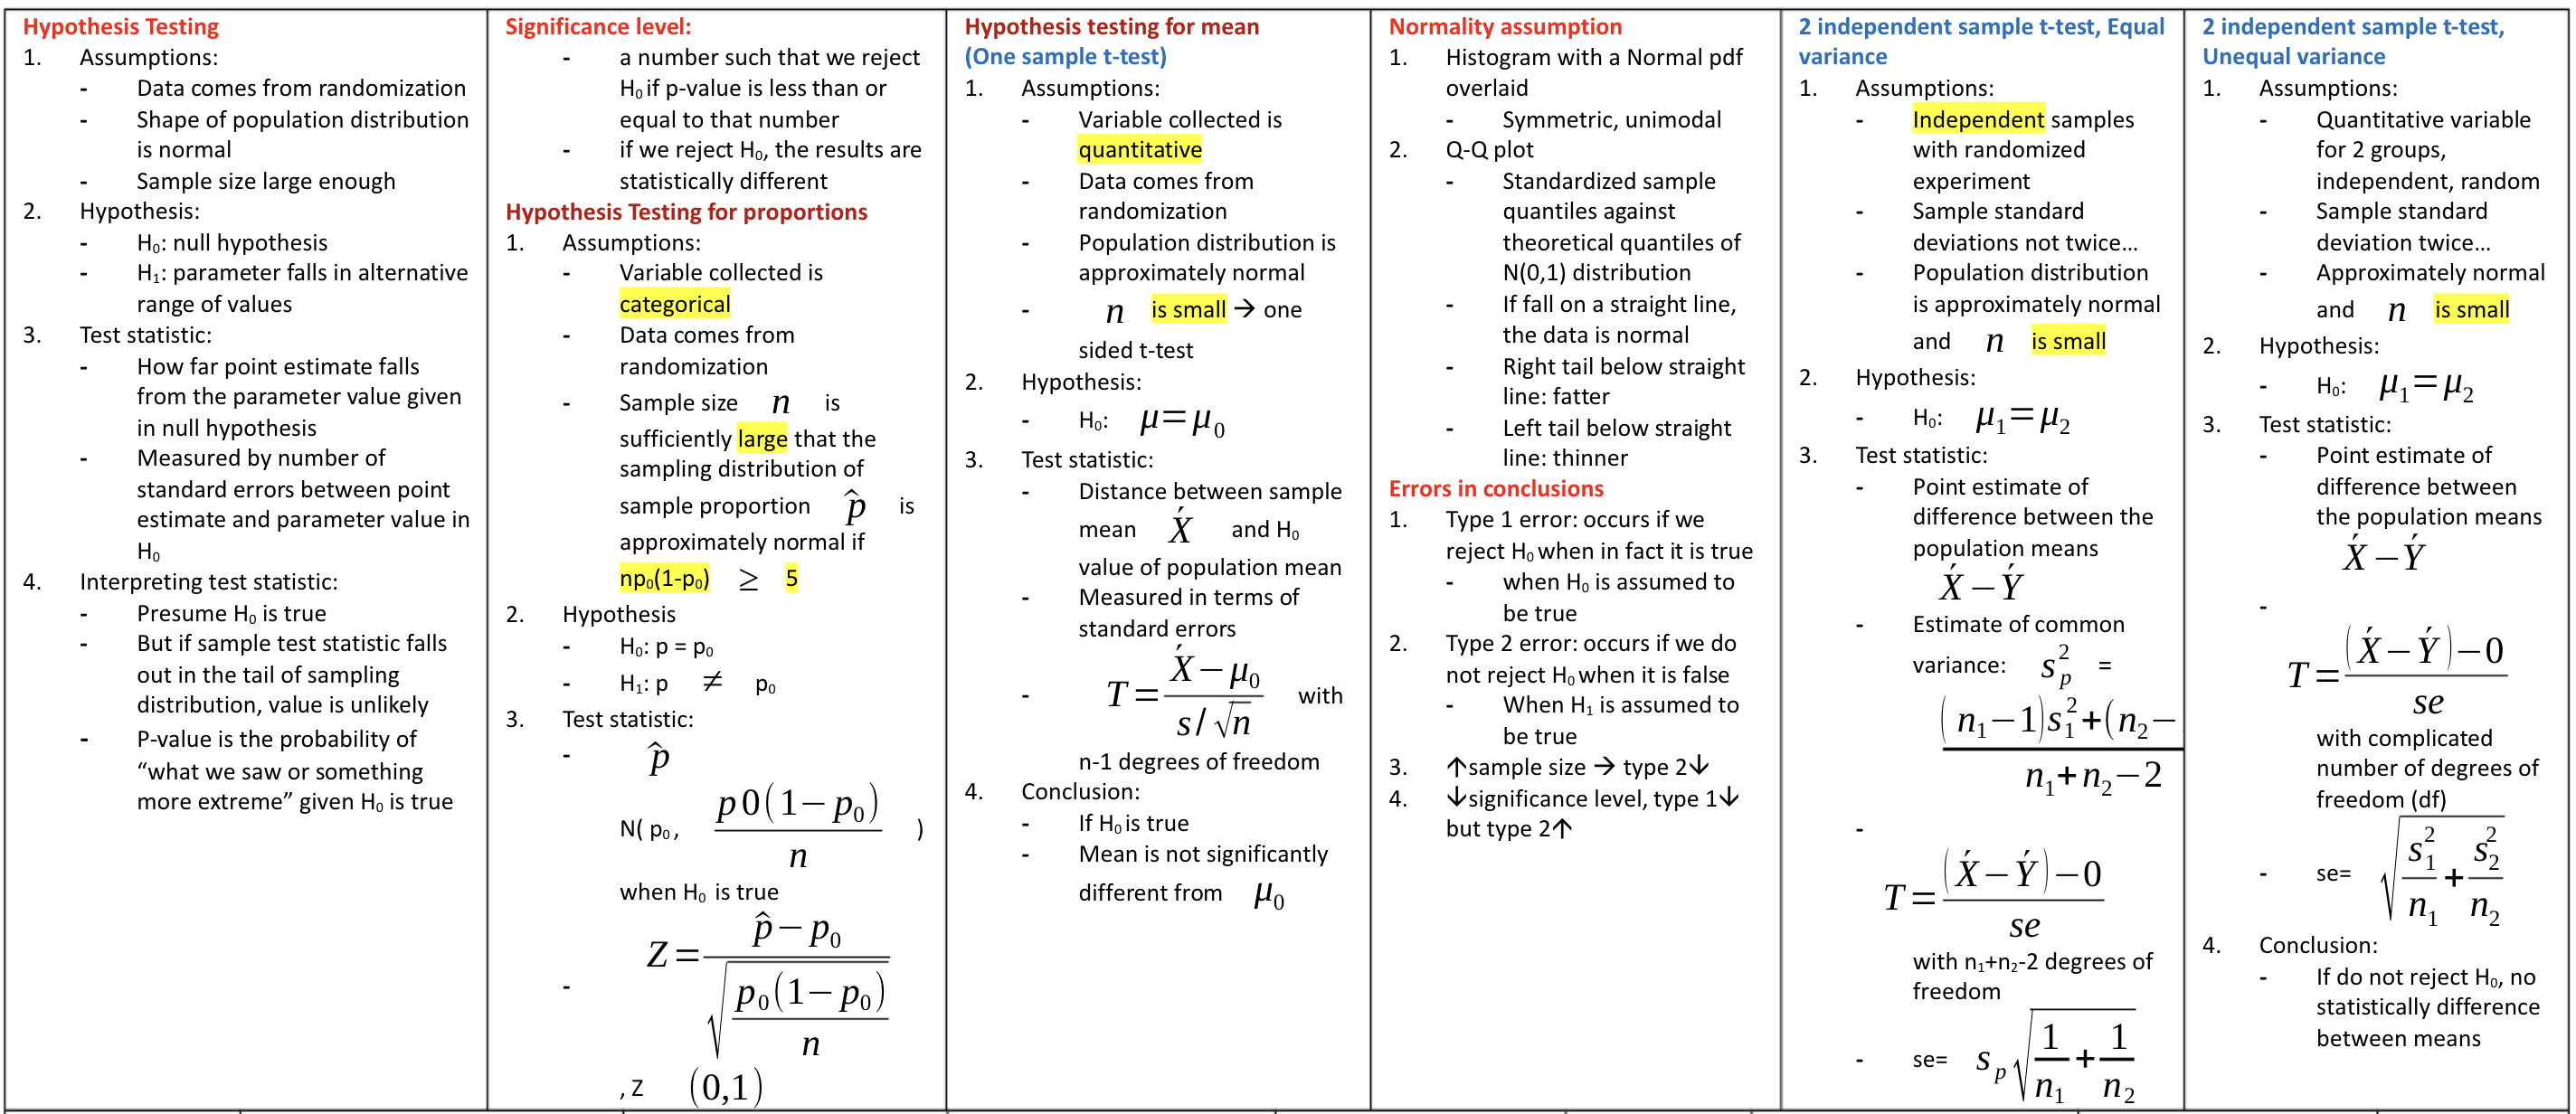

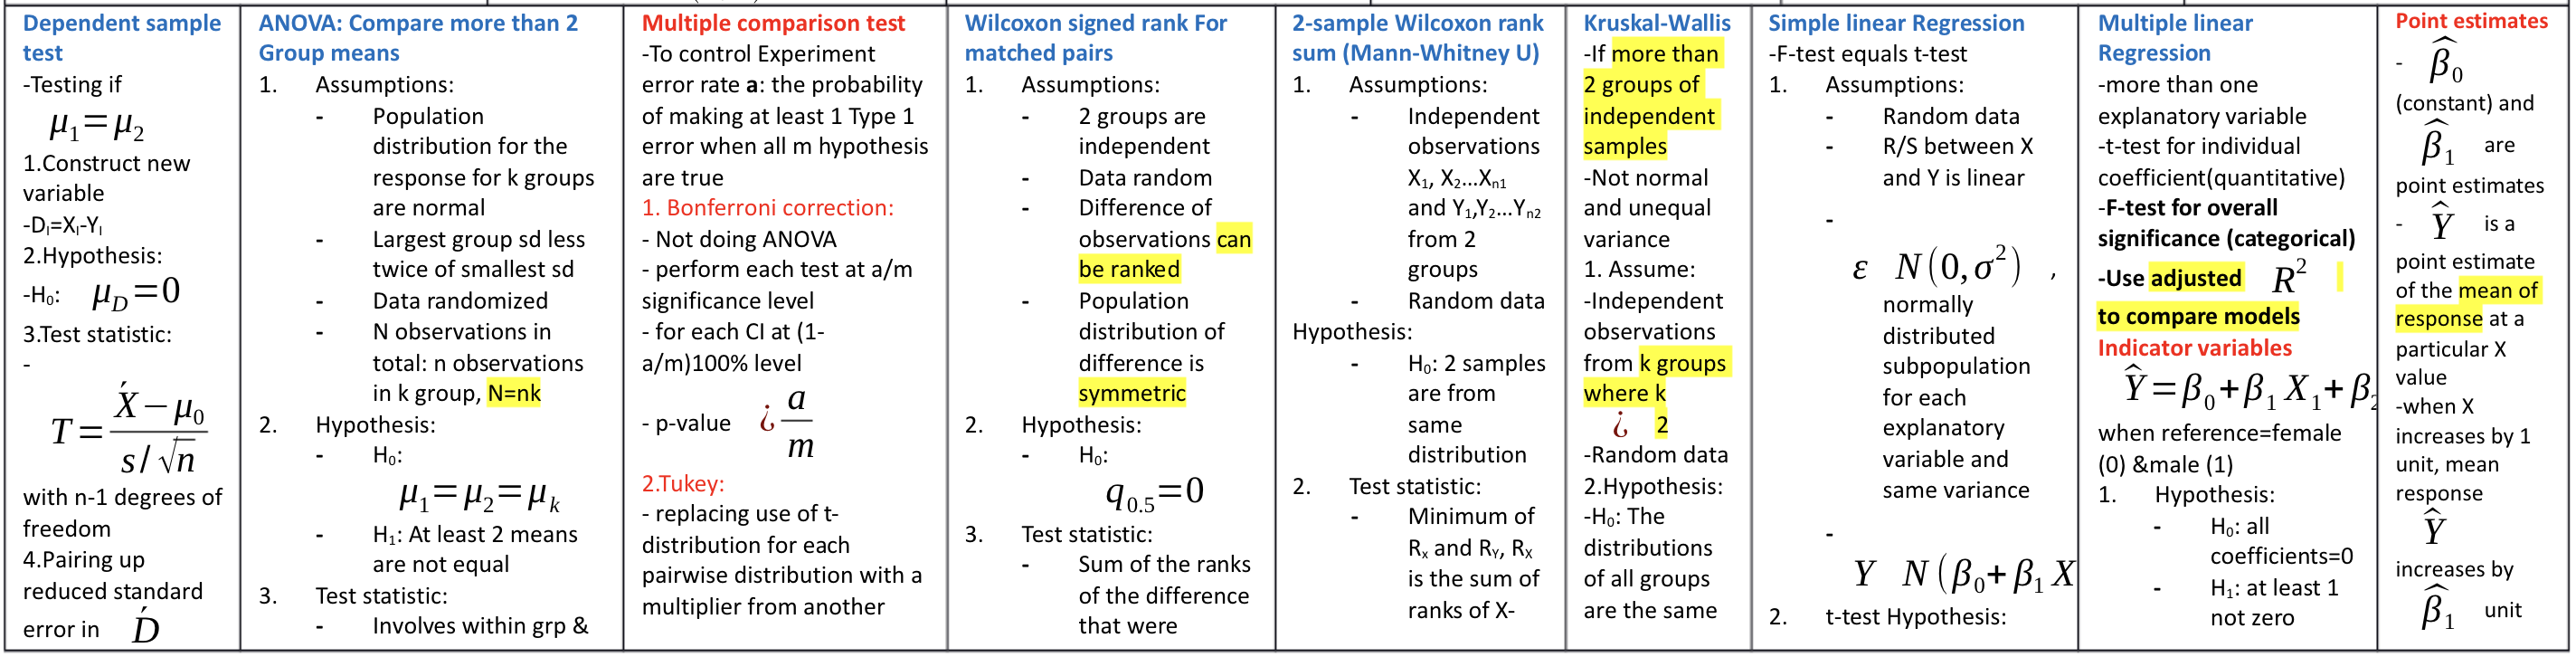

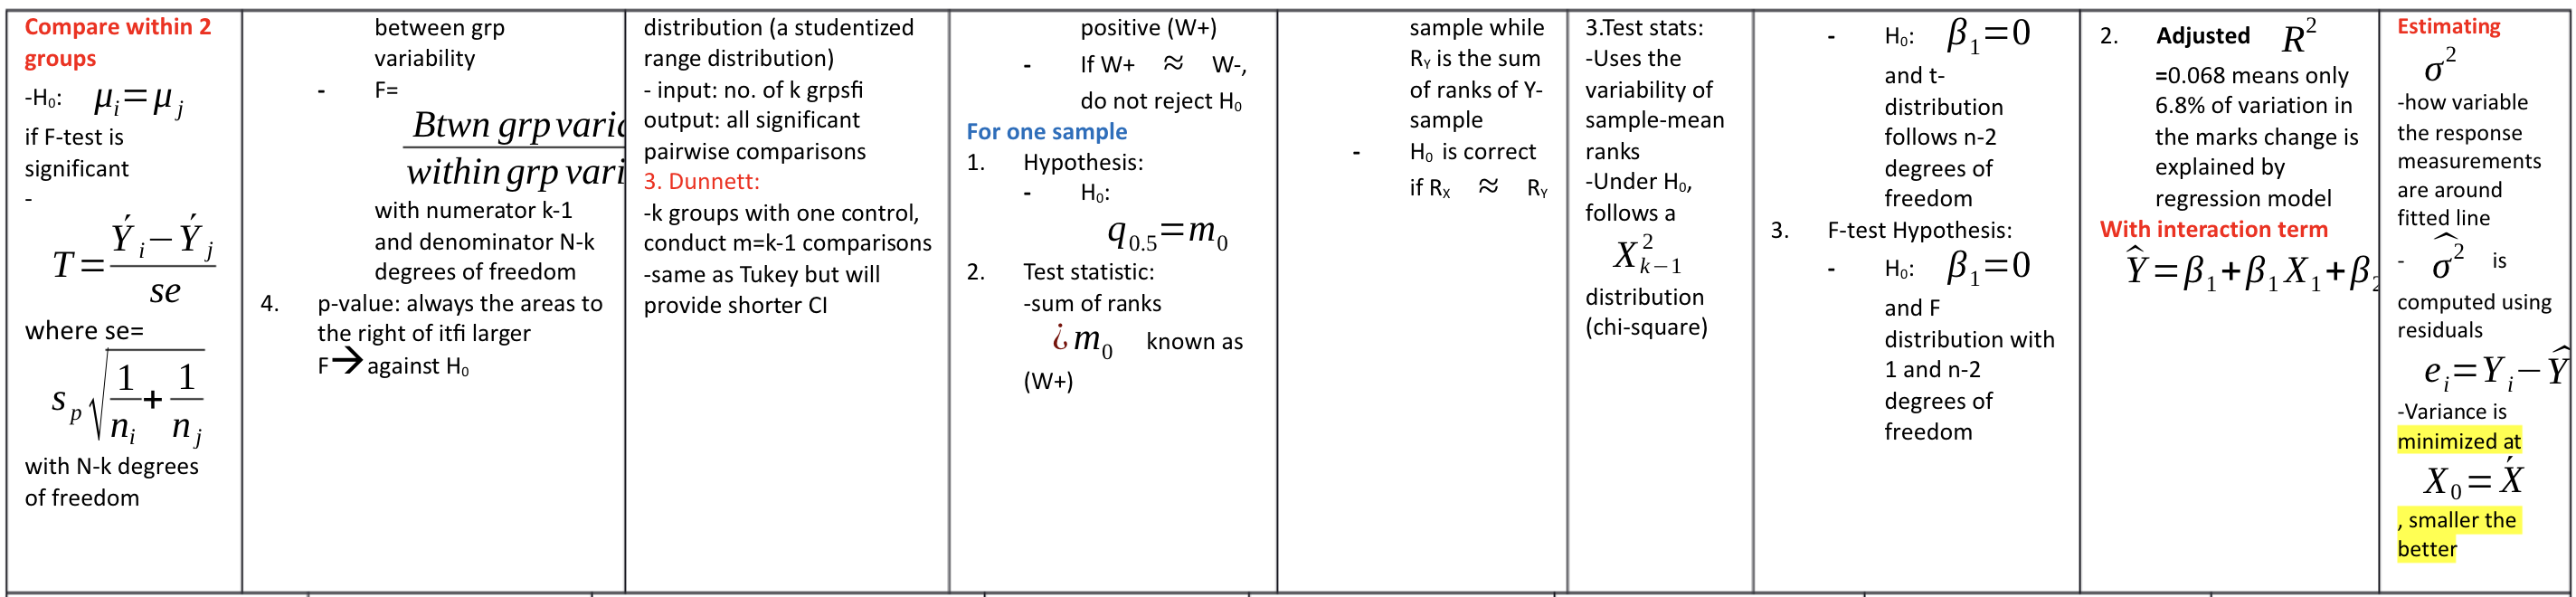

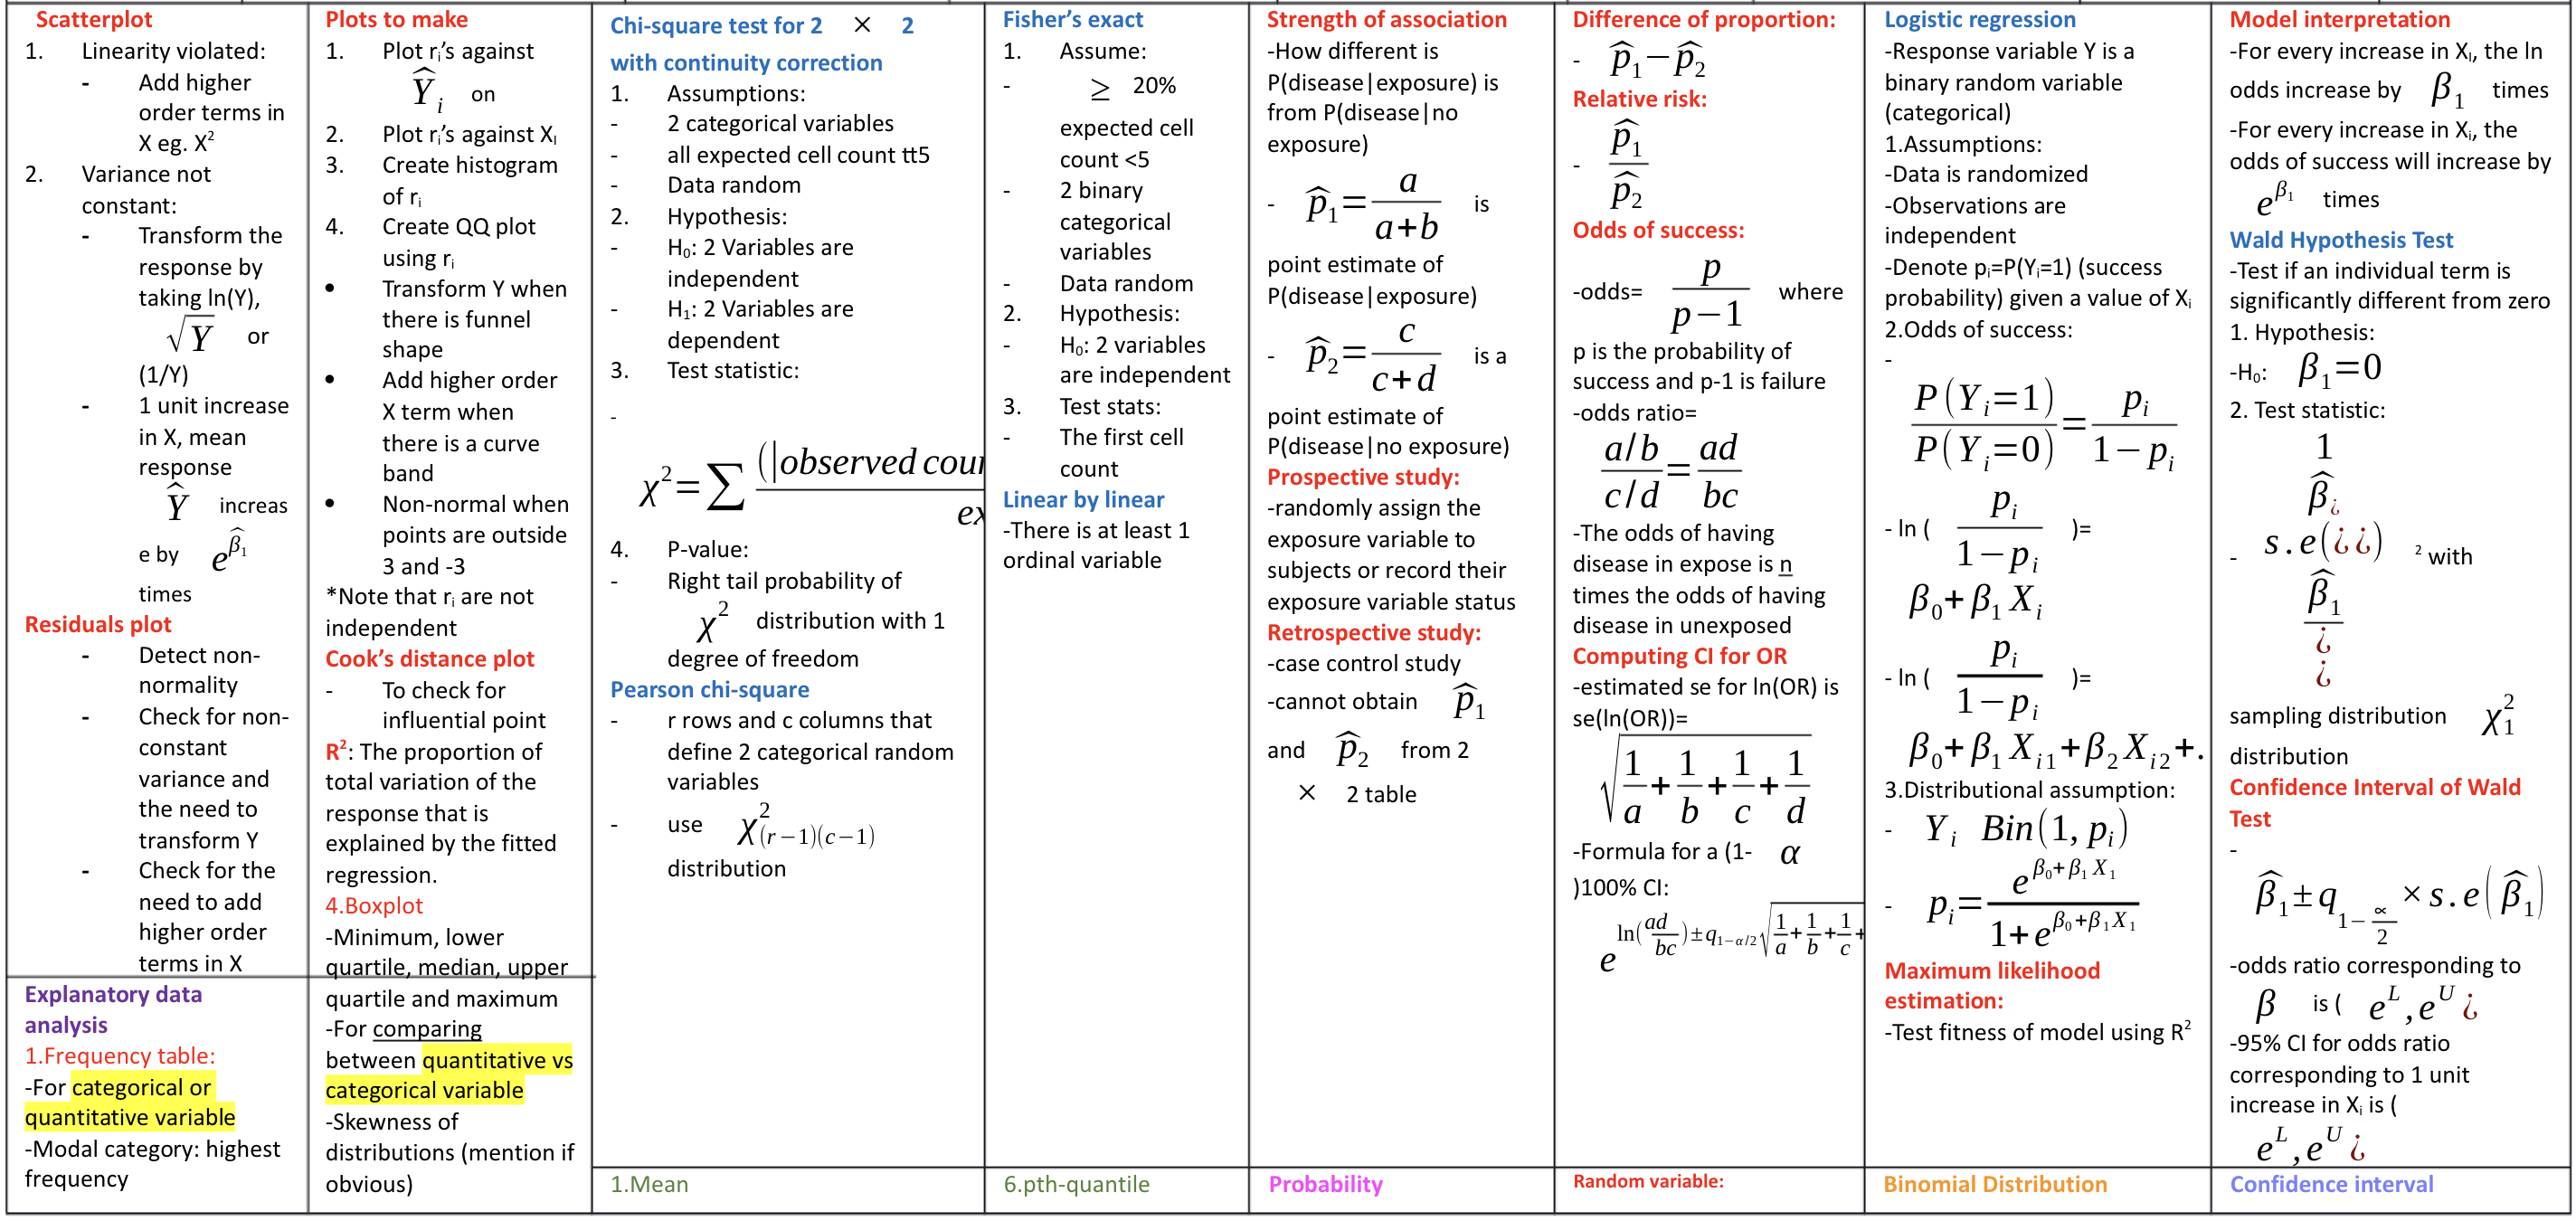

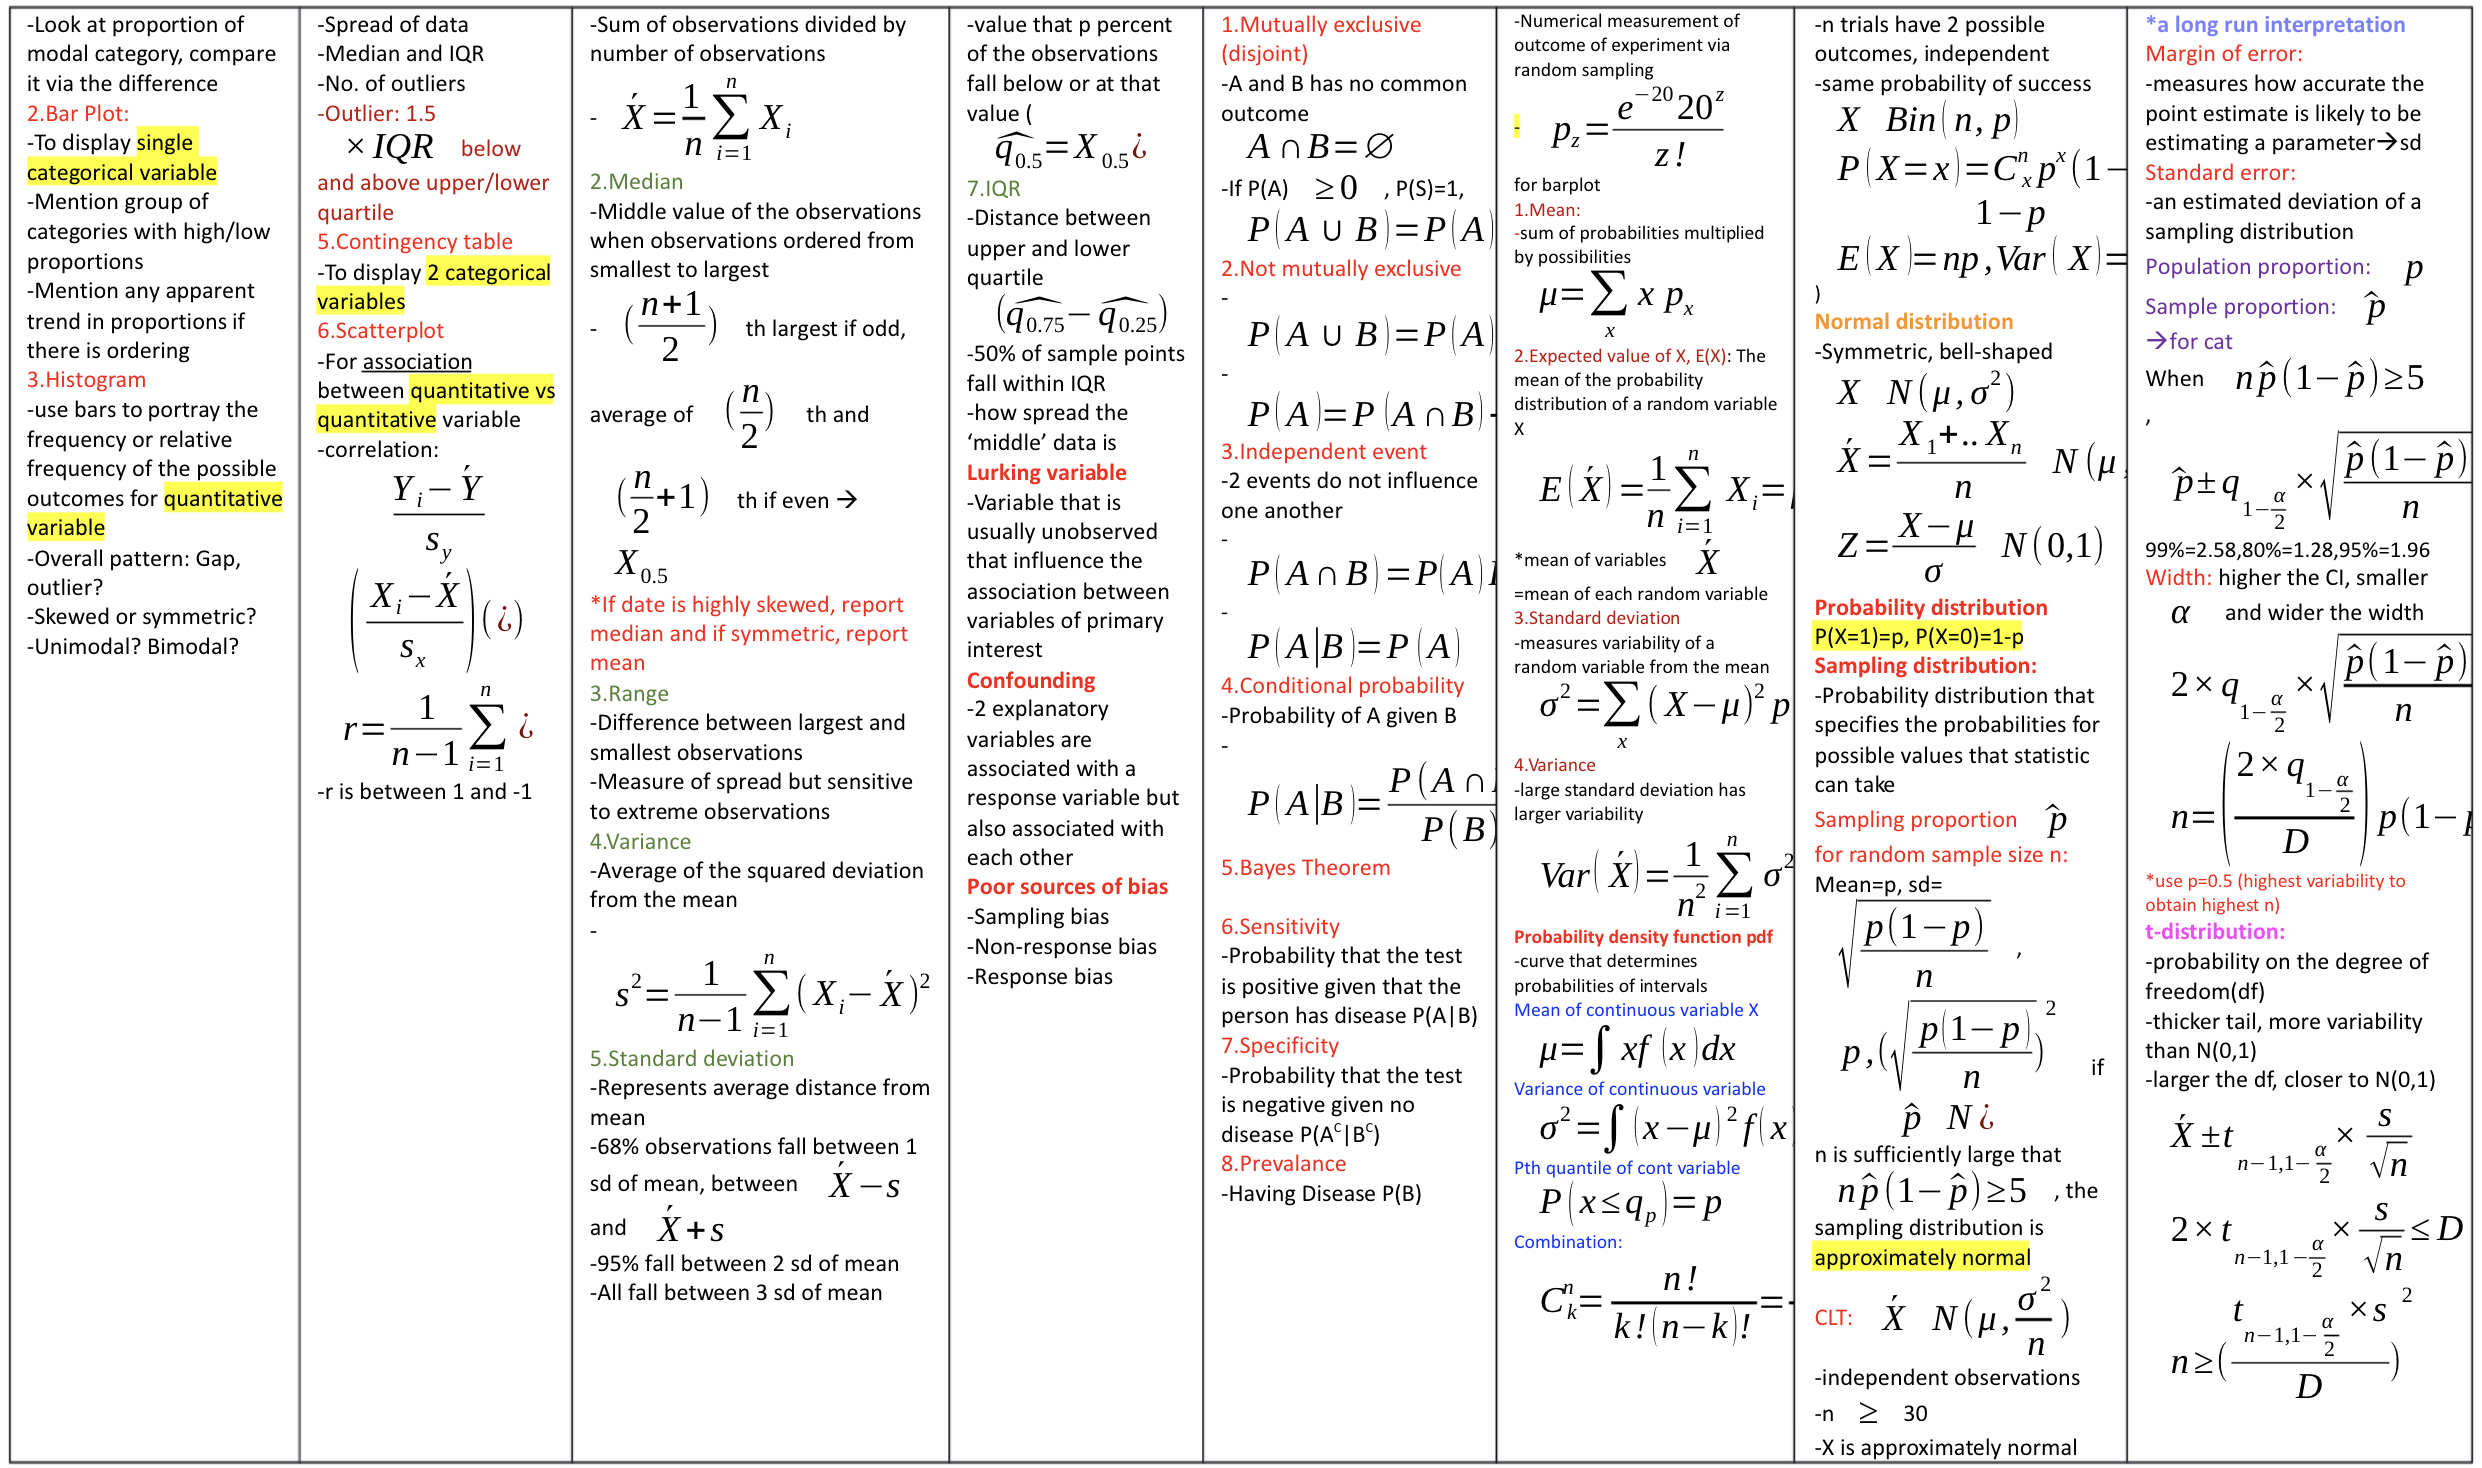